# 1. Descripción del sistema de información real:

*El dataset con el se va a culminar el diplomado es el del trabajo guido de AIRBNB que se has venido utilizando Durante cada una de las etapas del diplomado, el mismo que trata sobre la calificación que los clientes dan a su hospedaje en barrios de Nueva York en diferentes categorias. 

En este caso se ha seleccionado 75 atributos, con  los cuales consideramos se puede aplicar cualquier modelo para tratar de determinar el precio del mismo entre los más importantes tenemos la latitud la longitud si el dueño es un superhost, el vecindario, la calle, el número de cuartos, el número de baños, las camas.  los beneficios incluidos en el departamento su disponibilidad en días, el número de visitas que ha hecho Los visitantes políticas de cancelación y una cosa que considera o que se le dio un valor agregado es la de dividir el campo de "amenities" en varias características es decir extraer el texto y transformarlo en variable categórica.

El origen de los datos es el que se nos facilitó en la Fase 1 del diplomado, los mismos que han sufrido transformación y se ha realizado limpieza de los mismos.

El problema que se quiere resolver es determinar que modelo de clasificación permita modelar el problema con una tasa de aciertos alta, para ello se va a proponer realizar un dodelo de redes neuronales MLP.

El Objetivo de análisis predictivo es obtener una buena estimación de una muestra estratificada considerable sobre los datos originales y poder determinar cuales son los atributos que más pueden influir en el modelo.



In [9]:
#importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
#leer el archivo 'https://raw.githubusercontent.com/chris78rey/DIPLOM_BIGDATA/main/IPYNB_TODOS/airbnb_crrb_final.csv'
#guardarlo en la variable df separado por tabuladores y encoding de lenguaje español

df_airbnb_final = pd.read_csv('https://raw.githubusercontent.com/chris78rey/DIPLOM_BIGDATA/main/IPYNB_TODOS/airbnb_crrb_final.csv', sep='\t', header=0,encoding='latin-1')

df_airbnb_final.head()

,id,name,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,street,neighbourhood,latitude,...,INTERNET,WIFI,WHEELCHAIR ACCESSIBLE,KITCHEN,FREE PARKING ON PREMISES,ELEVATOR,WASHER,SMOKE DETECTOR,CARBON MONOXIDE DETECTOR,FIRST AID KIT
0,2539,Clean & quiet apt home by the park,2787,within an hour,1.000,0.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,...,1,1,1,1,1,1,1,1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,within a day,1.000,0.0,1.0,"New York, NY, United States",Harlem,40.80902,...,1,1,0,1,0,0,0,1,1,0
2,7750,Huge 2 BR Upper East Cental Park,17985,within a day,1.000,0.0,1.0,"New York, NY, United States",Harlem,40.79685,...,1,1,0,1,0,1,0,0,0,0
3,8505,Sunny Bedroom Across Prospect Park,25326,within an hour,1.000,1.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,...,0,1,0,0,0,0,1,1,1,1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,--,0.835,0.0,1.0,"New York, NY, United States",Manhattan,40.86754,...,1,1,0,1,0,1,1,1,0,1


# 2.-Detección
Identificar y describir las variables en el conjunto de datos, junto con su dominio y tipología (numérico, lógico, carácter).
Recuerde que cualquierpersona debería estar en capacidad de entender su informe, la información presentada debe ser clara y precisa.

In [11]:
#Identificar y describir las variables en el conjunto de datos
#Identificar y describir las variables en el conjunto de datos, junto con su dominio y tipología (numérico, lógico, carácter)
df_airbnb_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           30179 non-null  int64  
 1   name                         30179 non-null  object 
 2   host_id                      30179 non-null  int64  
 3   host_response_time           30179 non-null  object 
 4   host_response_rate           30179 non-null  float64
 5   host_is_superhost            30179 non-null  float64
 6   host_identity_verified       30179 non-null  float64
 7   street                       30179 non-null  object 
 8   neighbourhood                30179 non-null  object 
 9   latitude                     30179 non-null  float64
 10  longitude                    30179 non-null  float64
 11  property_type                30179 non-null  object 
 12  room_type                    30179 non-null  object 
 13  accommodates    

In [12]:
#estadística descriptiva de las variables numéricas
df_airbnb_final.describe()

,id,host_id,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,INTERNET,WIFI,WHEELCHAIR ACCESSIBLE,KITCHEN,FREE PARKING ON PREMISES,ELEVATOR,WASHER,SMOKE DETECTOR,CARBON MONOXIDE DETECTOR,FIRST AID KIT
count,3.017900e+04,3.017900e+04,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,...,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000
mean,2.088031e+07,7.238659e+07,0.905035,0.083551,0.487359,40.728593,-73.952292,2.723781,1.151595,1.265516,...,0.271878,0.976142,0.033169,0.925511,0.061036,0.292687,0.432685,0.854767,0.657477,0.300871
std,1.090207e+07,8.296663e+07,0.181318,0.276704,0.499799,0.054541,0.044117,1.700634,0.422225,0.614659,...,0.444935,0.152608,0.179080,0.262569,0.239400,0.455003,0.495456,0.352342,0.474561,0.458645
min,2.539000e+03,2.787000e+03,0.000000,0.000000,0.000000,40.499790,-74.244420,1.000000,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.127817e+07,9.165996e+06,0.900000,0.000000,0.000000,40.690720,-73.982085,2.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.175022e+07,3.314970e+07,1.000000,0.000000,0.000000,40.721450,-73.955280,2.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3.093442e+07,1.168645e+08,1.000000,0.000000,1.000000,40.762790,-73.936435,4.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.648724e+07,2.743213e+08,1.000000,1.000000,1.000000,40.913060,-73.716900,16.000000,7.500000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


|Orden|Variable|bytes|no-null|Tipo|
|---|---|---|---|---|
| 0   |id                           |30179 |non-null  |int64|
| 1   |name                         |30179 |non-null  |object|
| 2   |host_id                      |30179 |non-null  |int64|
| 3   |host_response_time           |30179 |non-null  |object|
| 4   |host_response_rate           |30179 |non-null  |float64| 
| 5   |host_is_superhost            |30179| non-null|  float64|
| 6   |host_identity_verified       |30179| non-null|  float64|
| 7   |street                       |30179| non-null|  object |
| 8   |neighbourhood                |30179| non-null|  object |
| 9   |latitude                     |30179| non-null|  float64|
| 10  |longitude                    |30179| non-null|  float64|
| 11  |property_type                |30179| non-null|  object |
| 12  |room_type                    |30179| non-null|  object |
| 13  |accommodates                 |30179| non-null|  int64  |
| 14  |bathrooms                    |30179| non-null|  float64|
| 15  |bedrooms                     |30179| non-null|  int64  |
| 16  |beds                         |30179| non-null|  int64  |
| 17  |bed_type                     |30179| non-null|  object |
| 18  |price                        |30179| non-null|  int64  |
| 19  |guests_included              |30179| non-null|  int64  |
| 20  |extra_people                 |30179| non-null|  int64  |
| 21  |minimum_nights               |30179| non-null|  int64  |
| 22  |has_availability             |30179| non-null|  int64  |
| 23  |availability_30              |30179| non-null|  int64  |
| 24  |availability_60              |30179| non-null|  int64  |
| 25  |availability_90              |30179| non-null|  int64  |
| 26  |availability_365             |30179| non-null|  int64  |
| 27  |number_of_reviews            |30179| non-null|  int64  |
| 28  |review_scores_rating         |30179| non-null|  float64|
| 29  |review_scores_accuracy       |30179| non-null|  float64|
| 30  |review_scores_checkin        |30179| non-null|  float64|
| 31  |review_scores_communication  |30179| non-null|  float64|
| 32  |review_scores_location       |30179| non-null|  float64|
| 33  |review_scores_value          |30179| non-null|  float64|
| 34  |cancellation_policy          |30179| non-null|  object |
| 35  |check_in_24h                 |30179| non-null|  int64  |
| 36  |air_conditioning             |30179| non-null|  int64  |
| 37  |high_end_electronics         |30179| non-null|  int64  |
| 38  |bbq                          |30179| non-null|  int64  |
| 39  |balcony                      |30179| non-null|  int64  |
| 40  |nature_and_views             |30179| non-null|  int64  |
| 41  |bed_linen                    |30179| non-null|  int64  |
| 42  |breakfast                    |30179| non-null|  int64  |
| 43  |tv                           |30179| non-null|  int64  |
| 44  |coffee_machine               |30179| non-null|  int64  |
| 45  |cooking_basics               |30179| non-null|  int64  |
| 46  |white_goods                  |30179| non-null|  int64  |
| 47  |elevator                     |30179| non-null|  int64  |
| 48  |gym                          |30179| non-null|  int64  |
| 49  |child_friendly               |30179| non-null|  int64  |
| 50  |parking                      |30179| non-null|  int64  |
| 51  |outdoor_space                |30179| non-null|  int64  |
| 52  |host_greeting                |30179| non-null|  int64  |
| 53  |hot_tub_sauna_or_pool        |30179| non-null|  int64  |
| 54  |internet                     |30179| non-null|  int64  |
| 55  |long_term_stays              |30179| non-null|  int64  |
| 56  |pets_allowed                 |30179| non-null|  int64  |
| 57  |private_entrance             |30179| non-null|  int64  |
| 58  |secure                       |30179| non-null|  int64  |
| 59  |self_check_in                |30179| non-null|  int64  |
| 60  |smoking_allowed              |30179| non-null|  int64  |
| 61  |accessible                   |30179| non-null|  int64  |
| 62  |event_suitable               |30179| non-null|  int64  |
| 63  |TV                           |30179| non-null|  int64  |
| 64  |CABLE |TV|                     30179 non|-null  int64  |
| 65  |INTERNET                     |30179| non-null|  int64  |
| 66  |WIFI                         |30179| non-null|  int64  |
| 67  |WHEELCHAIR |ACCESSIBLE|        30179 non|-null  int64  |
| 68  |KITCHEN                      |30179| non-null|  int64  |
| 69  |FREE |PARKING| ON PREMISES     30179| non-null  int64  |
| 70  |ELEVATOR                     |30179| non-null|  int64  |
| 71  |WASHER                       |30179| non-null|  int64  |
| 72  |SMOKE |DETECTOR|               30179 non|-null  int64  |
| 73  |CARBON |MONOXIDE| DETECTOR     30179 no|n-null  int64  |
| 74  |FIRST |AID| KIT                30179 no|n-null  int64|

In [13]:
#sacar los deciles de la variable precio y determinar en el rango desda hasta de cada decil
deciles=df_airbnb_final['price'].quantile([0.25,0.5,0.75,1])

#crear una nueva variable llamada 'decil' que contenga el decil al que pertenece cada precio
df_airbnb_final['decil']=pd.qcut(df_airbnb_final['price'],10,labels=['1','2','3','4','5','6','7','8','9','10'])

#crear una nueva variable llamada 'decil' que contenga el decil al que pertenece cada precio
df_airbnb_final['decil']=pd.qcut(df_airbnb_final['price'],10,labels=['1','2','3','4','5','6','7','8','9','10'])

#imprimir el head de los 20 primeros registros del campo decil


#tranformar la variable decil a string y preponga la palabra Clase
df_airbnb_final['decil']='Clase '+df_airbnb_final['decil'].astype(str)
df_airbnb_final['decil'].head(20)

df_airbnb_final.head(2)


,id,name,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,street,neighbourhood,latitude,...,WIFI,WHEELCHAIR ACCESSIBLE,KITCHEN,FREE PARKING ON PREMISES,ELEVATOR,WASHER,SMOKE DETECTOR,CARBON MONOXIDE DETECTOR,FIRST AID KIT,decil
0,2539,Clean & quiet apt home by the park,2787,within an hour,1.0,0.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,...,1,1,1,1,1,1,1,1,1,Clase 7
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,within a day,1.0,0.0,1.0,"New York, NY, United States",Harlem,40.80902,...,1,0,1,0,0,0,1,1,0,Clase 7


In [14]:
df_airbnb_final.shape

(30179, 76)

In [15]:
df_airbnb_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           30179 non-null  int64  
 1   name                         30179 non-null  object 
 2   host_id                      30179 non-null  int64  
 3   host_response_time           30179 non-null  object 
 4   host_response_rate           30179 non-null  float64
 5   host_is_superhost            30179 non-null  float64
 6   host_identity_verified       30179 non-null  float64
 7   street                       30179 non-null  object 
 8   neighbourhood                30179 non-null  object 
 9   latitude                     30179 non-null  float64
 10  longitude                    30179 non-null  float64
 11  property_type                30179 non-null  object 
 12  room_type                    30179 non-null  object 
 13  accommodates    

In [16]:
#reemplazar el nombre del campo decil por Class
df_airbnb_final.rename(columns={'decil':'Class'},inplace=True)

In [17]:
df_airbnb_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           30179 non-null  int64  
 1   name                         30179 non-null  object 
 2   host_id                      30179 non-null  int64  
 3   host_response_time           30179 non-null  object 
 4   host_response_rate           30179 non-null  float64
 5   host_is_superhost            30179 non-null  float64
 6   host_identity_verified       30179 non-null  float64
 7   street                       30179 non-null  object 
 8   neighbourhood                30179 non-null  object 
 9   latitude                     30179 non-null  float64
 10  longitude                    30179 non-null  float64
 11  property_type                30179 non-null  object 
 12  room_type                    30179 non-null  object 
 13  accommodates    

In [18]:
#seleccionar 1500 registros al azar del conjunto de datos de modo statified en base al campo Class
df_airbnb_final=df_airbnb_final.sample(n=1500,random_state=1)
df_airbnb_final.shape

(1500, 76)

In [19]:
#dividir el conjunto de datos en train y test
#Eliminar el campo price del conjunto de datos
df_airbnb_final.drop('price',axis=1,inplace=True)

#  3.-Análisis exploratorio
Usar las visualizaciones y estadísticas descriptivas para resumir y entender el comportamiento y estructura de los datos, recuerde que no es solo mostrar los estadísticos y gráficas, debe haber un análisis sistemático de cada variable y las relaciones existentes usando los recursos vistos en clase y listados a continuación.
Medidas de tendencia central
Medidas de dispersión
Histogramas
Diagramas de barras
Boxplots
Diagramas de dispersión – pair plots
Análisis de correlación

MEDIDAS DE TENDENCIA CENTRAL

In [20]:
#Determinar las medidas de tendencia central y dispersión de las variables numéricas del dataframe df_airbnb_final
df_airbnb_final.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1500.0,2.089126e+07,1.080490e+07,7750.0,1.122722e+07,21908389.0,3.040772e+07,36450896.0
host_id,1500.0,7.565374e+07,8.468380e+07,2868.0,9.295613e+06,34377906.5,1.331576e+08,273354185.0
host_response_rate,1500.0,9.045517e-01,1.758848e-01,0.0,8.937143e-01,1.0,1.000000e+00,1.0
host_is_superhost,1500.0,7.866667e-02,2.693076e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
host_identity_verified,1500.0,4.940000e-01,5.001307e-01,0.0,0.000000e+00,0.0,1.000000e+00,1.0
...,...,...,...,...,...,...,...,...
ELEVATOR,1500.0,2.833333e-01,4.507671e-01,0.0,0.000000e+00,0.0,1.000000e+00,1.0
WASHER,1500.0,4.273333e-01,4.948564e-01,0.0,0.000000e+00,0.0,1.000000e+00,1.0
SMOKE DETECTOR,1500.0,8.646667e-01,3.421933e-01,0.0,1.000000e+00,1.0,1.000000e+00,1.0
CARBON MONOXIDE DETECTOR,1500.0,6.640000e-01,4.724964e-01,0.0,0.000000e+00,1.0,1.000000e+00,1.0


**HISTOGRAMAS**

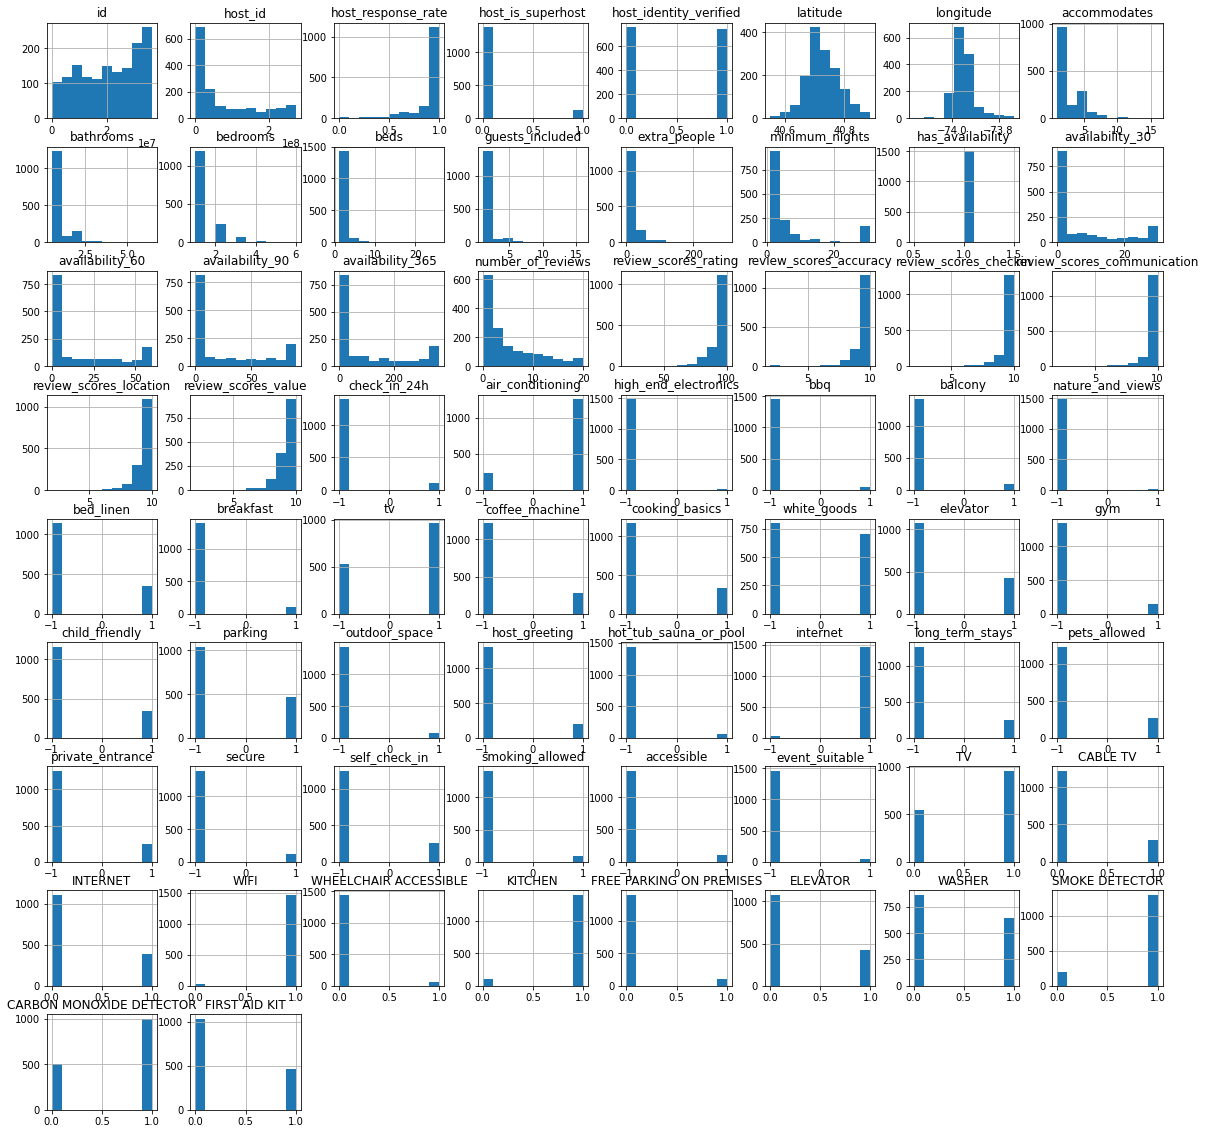

In [21]:
#Hacer los histogramas de las variables numéricas del dataframe df_airbnb_final 
df_airbnb_final.hist(figsize=(20,20))
plt.show()


**DIAGRAMA DE BARRAS**

In [22]:
#Se agrupan las variables numéricas por clase Class
df_airbnb_final_count=  df_airbnb_final.groupby('Class').sum()
df_airbnb_final_count

,id,host_id,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,INTERNET,WIFI,WHEELCHAIR ACCESSIBLE,KITCHEN,FREE PARKING ON PREMISES,ELEVATOR,WASHER,SMOKE DETECTOR,CARBON MONOXIDE DETECTOR,FIRST AID KIT
Class,,,,,,,,,,,,,,,,,,,,,
Clase 1,3576619340,14920708172,141.765277,16.0,58.0,6268.81352,-11384.25075,245,196.5,159,...,23,151,2,138,11,19,51,122,96,43
Clase 10,3394078106,13977705180,133.134690,9.0,57.0,5988.55415,-10873.88008,702,214.0,281,...,34,147,6,136,6,71,87,129,113,37
Clase 2,4350616656,15713715880,181.094012,20.0,95.0,8144.22490,-14788.14972,337,237.5,208,...,41,195,2,182,16,30,62,171,119,58
Clase 3,1933337826,7500620355,81.725034,2.0,50.0,3788.16467,-6875.76065,185,114.5,99,...,27,91,6,86,10,18,44,81,60,27
Clase 4,2956378662,11497445653,135.190313,12.0,79.0,6027.61018,-10942.92427,280,165.0,159,...,42,143,3,134,17,44,61,129,85,55
Clase 5,3648225125,14139410813,160.782489,10.0,83.0,7209.28599,-13089.09381,424,188.5,207,...,44,172,7,164,10,53,69,152,106,68
Clase 6,2714981138,9149493364,128.676020,14.0,86.0,5863.68481,-10650.15747,403,154.0,176,...,46,137,7,136,15,33,50,127,108,43
Clase 7,2845222552,9367585396,132.346472,6.0,83.0,5946.20084,-10797.28072,445,159.0,192,...,46,142,7,139,9,44,64,133,103,41
Clase 8,3906793360,10277804218,177.455418,26.0,115.0,8106.81350,-14719.03380,670,220.0,283,...,64,196,10,190,10,71,96,173,137,59


<AxesSubplot:>

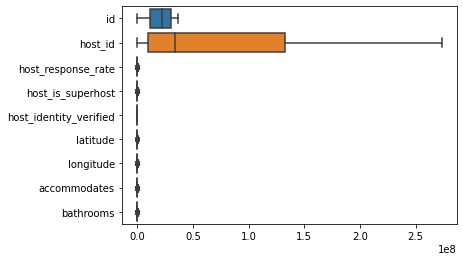

In [23]:
#Se hace los boxplot de las 4 primeras variables  numericas del dataframe df_airbnb_final de forma vertical con la libreria seaborn
sns.boxplot(data=df_airbnb_final.iloc[:,0:15],orient='h')

<AxesSubplot:>

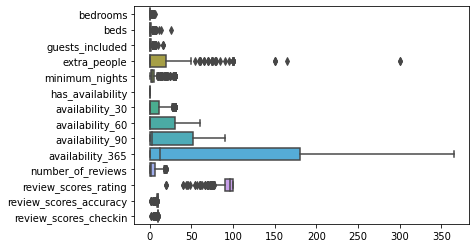

In [24]:
#Se hace los boxplot de las 4 primeras variables  numericas del dataframe df_airbnb_final de forma vertical con la libreria seaborn
sns.boxplot(data=df_airbnb_final.iloc[:,15:30],orient='h')

<AxesSubplot:>

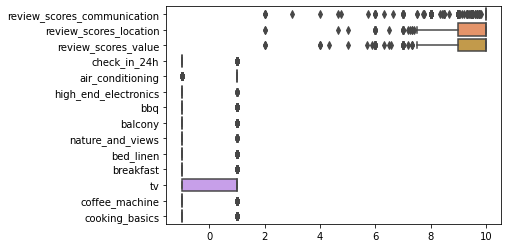

In [25]:
#Se hace los boxplot de las 4 primeras variables  numericas del dataframe df_airbnb_final de forma vertical con la libreria seaborn
sns.boxplot(data=df_airbnb_final.iloc[:,30:45],orient='h')

<AxesSubplot:>

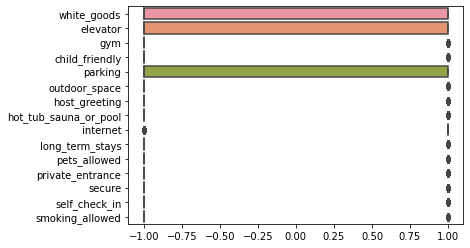

In [26]:
#Se hace los boxplot de las 4 primeras variables  numericas del dataframe df_airbnb_final de forma vertical con la libreria seaborn
sns.boxplot(data=df_airbnb_final.iloc[:,45:60],orient='h')

<AxesSubplot:>

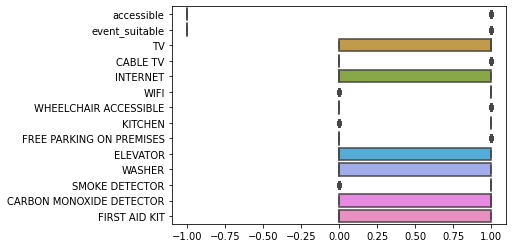

In [27]:
#Se hace los boxplot de las 4 primeras variables  numericas del dataframe df_airbnb_final de forma vertical con la libreria seaborn
sns.boxplot(data=df_airbnb_final.iloc[:,60:80],orient='h')

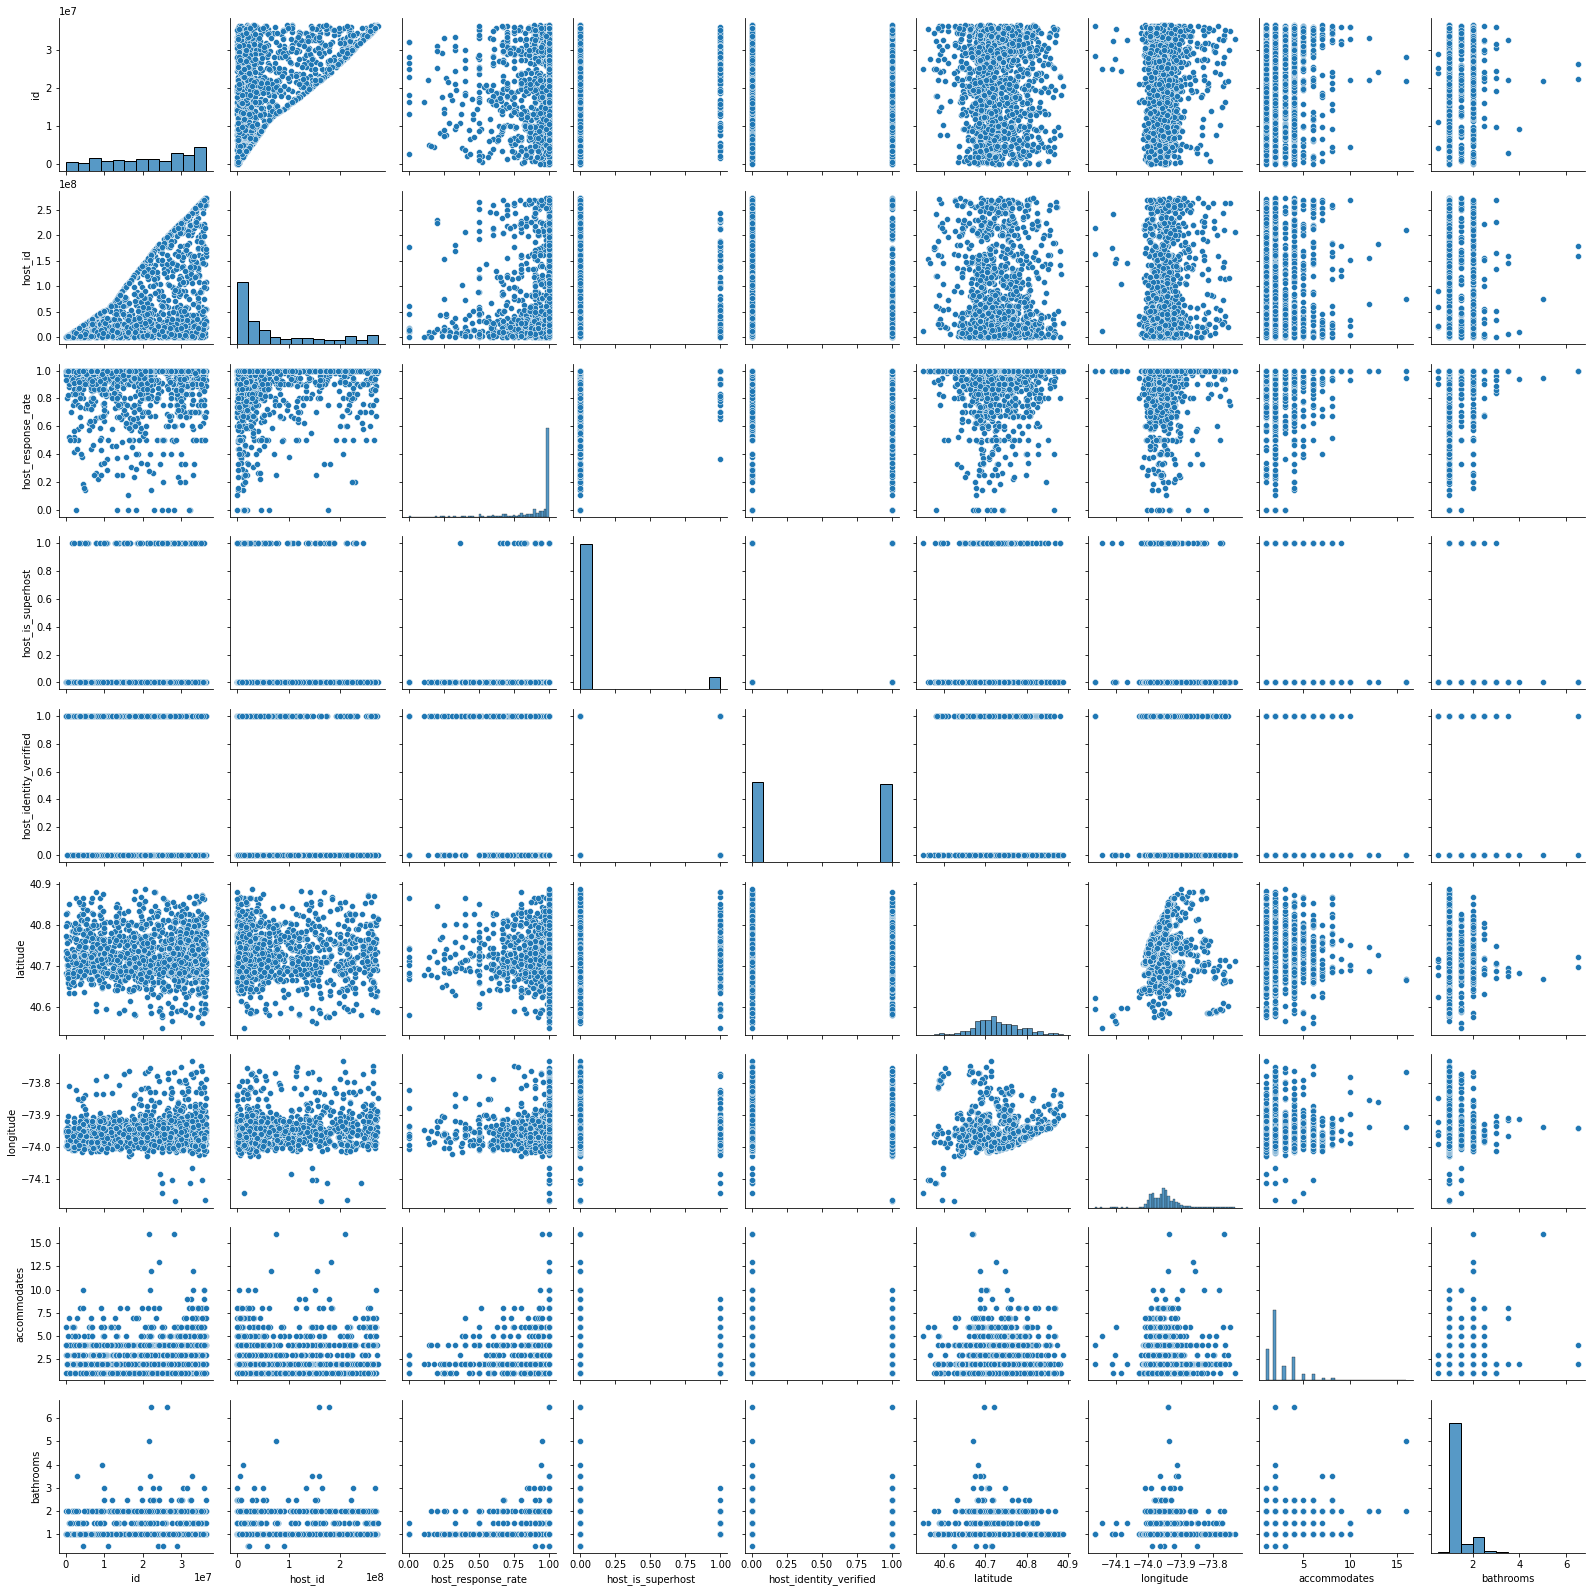

In [28]:
#luego se hace el diagrama de dispersión de las variables numéricas del dataframe df_airbnb_final
sns.pairplot(df_airbnb_final.iloc[:,0:15] )


<AxesSubplot:>

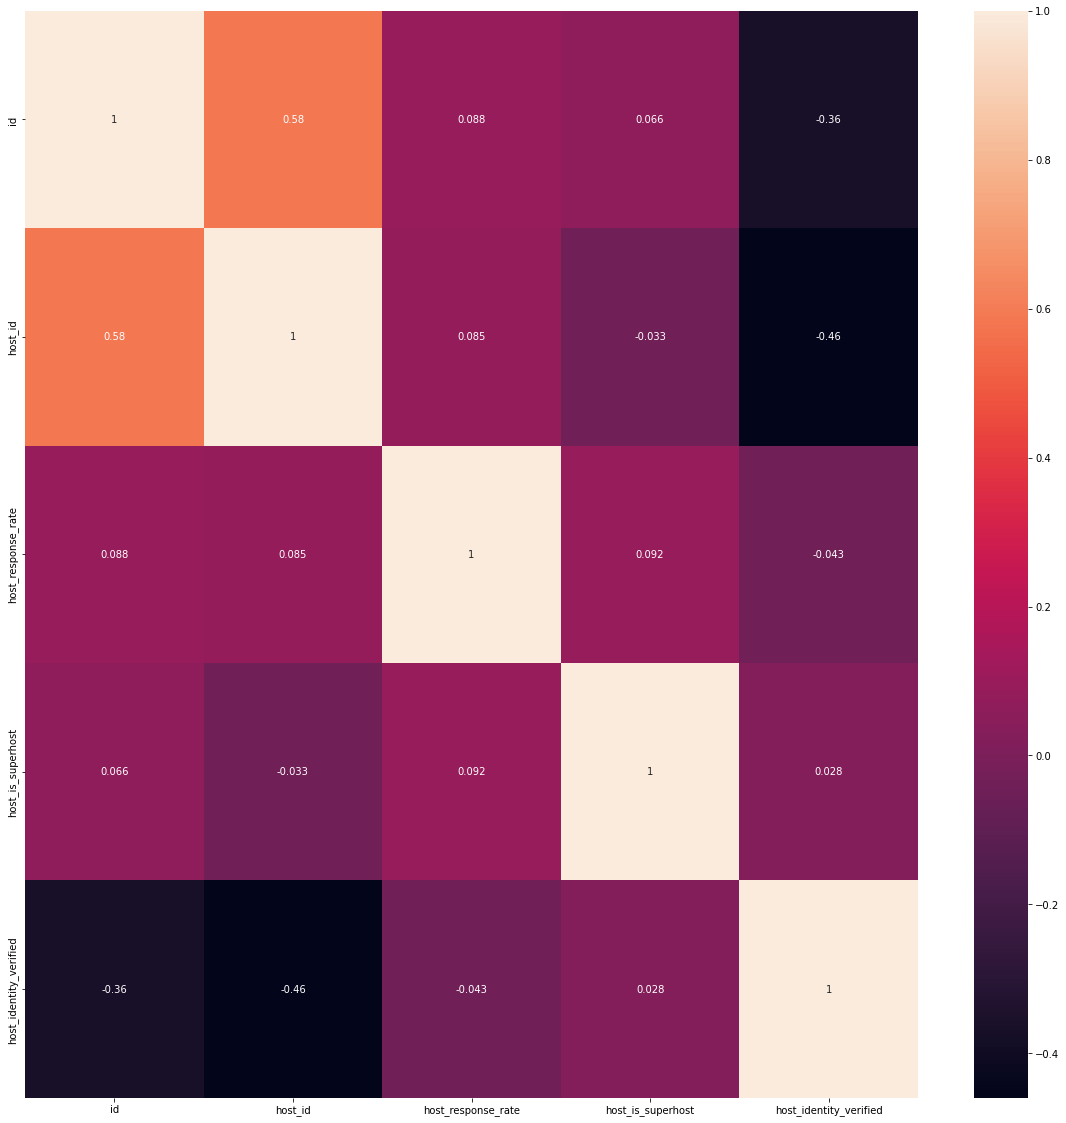

In [29]:
#hacer gráfico de la correlación de las 15 primeras variables numéricas del dataframe df_airbnb_final
plt.figure(figsize=(20,20))
correla=df_airbnb_final.iloc[:,0:100].corr()
sns.heatmap(df_airbnb_final.iloc[:,0:7].corr(),annot=True)

#  4.- Corrección de datos
- Identificar las variables que se pueden excluir del conjunto de datos, justificar el criterio empleado.
- Identificar y corregir la presencia de valores faltantes.
- Identificar y corregir la presencia de valores outliers.


In [30]:
#en base a correlacion determinar que variables se pueden eliminar
#eliminar las variables que tienen una correlación mayor a 0.9
correla

,id,host_id,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,INTERNET,WIFI,WHEELCHAIR ACCESSIBLE,KITCHEN,FREE PARKING ON PREMISES,ELEVATOR,WASHER,SMOKE DETECTOR,CARBON MONOXIDE DETECTOR,FIRST AID KIT
id,1.000000,0.584600,0.088062,0.065682,-0.363730,-0.038851,0.109690,0.094201,0.037108,0.066214,...,-0.644155,-0.004318,-0.177888,-0.107997,0.031340,-0.037007,0.018425,0.117166,0.146725,0.073101
host_id,0.584600,1.000000,0.085423,-0.033124,-0.459732,0.012034,0.120481,0.098126,0.081127,0.062209,...,-0.386274,-0.021943,-0.115471,-0.145418,0.058363,0.018192,-0.015094,0.057091,0.086193,0.104902
host_response_rate,0.088062,0.085423,1.000000,0.091917,-0.042928,0.033150,0.013982,0.065295,-0.013585,0.039143,...,-0.040913,0.003924,-0.030831,-0.019041,-0.026073,-0.048367,0.033814,0.059076,0.092789,0.025426
host_is_superhost,0.065682,-0.033124,0.091917,1.000000,0.028272,-0.038351,0.034305,0.029085,-0.017212,0.050591,...,-0.084000,0.045165,-0.020909,0.021265,-0.013636,-0.040849,0.002877,0.072168,0.108250,0.108364
host_identity_verified,-0.363730,-0.459732,-0.042928,0.028272,1.000000,-0.042673,-0.064521,-0.085931,-0.045506,-0.056257,...,0.278553,0.029061,0.081315,0.096461,-0.004445,-0.035361,0.009019,-0.030085,-0.050882,-0.068244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ELEVATOR,-0.037007,0.018192,-0.048367,-0.040849,-0.035361,0.202224,-0.161072,0.048491,-0.016230,-0.039213,...,0.039197,0.008984,0.200039,0.037663,-0.059301,1.000000,0.377970,0.019534,-0.013155,-0.048938
WASHER,0.018425,-0.015094,0.033814,0.002877,0.009019,0.054559,-0.113142,0.096110,0.161141,0.081486,...,0.018566,0.026395,0.060921,0.076622,0.006678,0.377970,1.000000,0.073861,0.080960,0.047834
SMOKE DETECTOR,0.117166,0.057091,0.059076,0.072168,-0.030085,-0.008635,0.043251,0.089292,0.033120,0.051852,...,-0.039064,0.016309,0.039949,0.053132,0.018783,0.019534,0.073861,1.000000,0.523143,0.202870
CARBON MONOXIDE DETECTOR,0.146725,0.086193,0.092789,0.108250,-0.050882,-0.004019,0.041203,0.155570,0.084984,0.111826,...,-0.083300,0.011594,0.042287,0.044762,0.076509,-0.013155,0.080960,0.523143,1.000000,0.261873


In [31]:
#listar la correlaciones mayor a 0.03 y menor a -0.03 y eliminelas del dataframe df_airbnb_final
correla[correla>0.03]
#Se listan las variables con correlaciones  mayores a 0.30 y menores a -0.30
correla=correla[correla>0.02]
correla
#llenar el dataset correla con valores 0 en donde hay valores NaN
correla.fillna(0,inplace=True)
correla

#llenar el dataset correla con valores 1 en donde hay valores mayores a 0
correla[correla>0]=1
correla

correla_escoge=correla.sum()
#Se ordena correla_escoge de menor a mayor
correla_escoge.sort_values(ascending=True)
#seleccionamos las variables que tienen valores mayores a 15
correla_escoge=correla_escoge[correla_escoge>34]
correla_escoge.sort_values(ascending=True)

#se transforma correla_escoge en un dataframe
correla_escoge=pd.DataFrame(correla_escoge)
correla_escoge
#se crea un campo de nombre seleccion en el data frame correla_escoge con el valor del rowid
correla_escoge['seleccion_columna']=correla_escoge.index
correla_escoge

#seleccionar el correla_escoge en una lista de variables
lista_variables=correla_escoge['seleccion_columna'].tolist()

In [32]:
#Se selecciona del df_airbnb_final las variables que estan en la lista de variables y la variable Clase y almacenarlo en un nuevo dataframe
df_airbnb_final=df_airbnb_final[lista_variables+['Class']]
#se aumenta las variables string a la lista_variables
df_airbnb_final

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,availability_365,...,self_check_in,accessible,TV,CABLE TV,KITCHEN,WASHER,SMOKE DETECTOR,CARBON MONOXIDE DETECTOR,FIRST AID KIT,Class
12439,18722146,0.0,1,1.0,1,1,1,35,2,87,...,-1,-1,1,0,1,0,1,0,0,Clase 7
2156,3953415,0.0,2,1.0,1,1,2,0,2,349,...,1,-1,1,1,1,0,1,1,1,Clase 4
88,138216,0.0,3,1.0,1,2,2,20,5,9,...,1,-1,1,0,1,0,1,1,1,Clase 7
527,789686,0.0,2,1.0,1,1,2,50,3,0,...,-1,-1,0,0,1,0,1,0,0,Clase 4
21364,30038437,0.0,2,1.0,1,1,2,50,7,21,...,1,-1,1,0,1,0,1,1,0,Clase 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,4865454,0.0,2,1.0,1,1,1,25,3,201,...,1,-1,0,0,1,1,1,1,1,Clase 1
11076,16353473,0.0,1,1.0,1,1,1,0,5,0,...,-1,-1,0,0,1,1,1,0,0,Clase 2
1906,3561828,0.0,2,1.0,1,1,1,0,3,0,...,-1,-1,0,1,1,1,1,1,0,Clase 7
7291,10631201,0.0,4,1.0,1,2,1,0,1,0,...,-1,1,1,1,1,0,1,1,1,Clase 8


#  5.-Transformación
Numerizar variables categóricas usando variables dummy.
Transformar variables según tipología o crear nuevas variables.
Transformar variables numéricas usando normalización o estandarización.

In [33]:
#Se transforma las variables categoricas  a dummy
df_airbnb_final_tmp = pd.read_csv('https://raw.githubusercontent.com/chris78rey/DIPLOM_BIGDATA/main/IPYNB_TODOS/airbnb_crrb_final.csv', sep='\t', header=0,encoding='latin-1')

In [34]:
#transformar la variables street	neighbourhood a dummy
df_airbnb_final_tmp = pd.get_dummies(df_airbnb_final_tmp, columns=['street','neighbourhood'], drop_first=True)
df_airbnb_final_tmp.head(2)

,id,name,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,property_type,...,neighbourhood_West Village,neighbourhood_Westchester Village,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
0,2539,Clean & quiet apt home by the park,2787,within an hour,1.0,0.0,1.0,40.64749,-73.97237,Apartment,...,0,0,0,0,0,0,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,within a day,1.0,0.0,1.0,40.80902,-73.94190,Apartment,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Normalizar las variables numéricas del dataframe df_airbnb_final

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_airbnb_final_norm=df_airbnb_final
df_airbnb_final_norm.iloc[:,0:38] = scaler.fit_transform(df_airbnb_final_norm.iloc[:,0:38])
df_airbnb_final_norm.head(2)


,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,availability_365,...,self_check_in,accessible,TV,CABLE TV,KITCHEN,WASHER,SMOKE DETECTOR,CARBON MONOXIDE DETECTOR,FIRST AID KIT,Class
12439,0.513523,0.0,0.000000,0.083333,0.0,0.0,0.000000,0.116667,0.033333,0.238356,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Clase 7
2156,0.108269,0.0,0.066667,0.083333,0.0,0.0,0.066667,0.000000,0.033333,0.956164,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Clase 4


# 6.- Partición de entrenamiento y prueba
Usar las técnicas vistas para crear un subconjunto de prueba y uno de entrenamiento.
Recuerde definir una semilla para que obtenga reproducibilidad durante la experimentación.

In [36]:
#      Partición de entrenamiento y prueba
#Se importa la libreria train_test_split
from sklearn.model_selection import train_test_split
#separamos las variables predictoras de la variable clase
X = df_airbnb_final_norm.iloc[:,0:38]
y = df_airbnb_final_norm.iloc[:,38]
#separamos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 7.- Modelamiento
Escoja 3 algoritmos de Machine Learning para hacer el entrenamiento de su modelo, puede escoger algoritmos no vistos en clase.
Haga un breve resumen de las ventajas y desventajas de los algoritmos escogidos.

In [37]:
#trabajar con el algoritmo de regresion logistica con los conjuntos de test y prueba
#variar sus parametros con un lazo for

#Se importa la libreria LogisticRegression
from sklearn.linear_model import LogisticRegression
#Se importa la libreria confusion_matrix
from sklearn.metrics import confusion_matrix

#Se crea un lazo for para variar los parametros de la regresion logistica
for i in range(1,10):
    #Se crea el modelo de regresion logistica
    logreg = LogisticRegression(C=i,random_state=0)
    #Se entrena el modelo de regresion logistica
    logreg.fit(X_train, y_train)
    #Se hace la prediccion del modelo de regresion logistica
    y_pred = logreg.predict(X_test)
    #Se crea la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    #Se calcula la exactitud del modelo
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/conf_matrix.sum()
    #Se imprime la exactitud del modelo
    print('Exactitud del modelo con C =',i,':',accuracy)

    

Exactitud del modelo con C = 1 : 0.08222222222222222


c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Exactitud del modelo con C = 2 : 0.08666666666666667
Exactitud del modelo con C = 3 : 0.08444444444444445
Exactitud del modelo con C = 4 : 0.08222222222222222


c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Exactitud del modelo con C = 5 : 0.08
Exactitud del modelo con C = 6 : 0.08
Exactitud del modelo con C = 7 : 0.08222222222222222
Exactitud del modelo con C = 8 : 0.08222222222222222
Exactitud del modelo con C = 9 : 0.08222222222222222


c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [38]:
#trabajar con el algoritmo de random forest con los conjuntos de test y prueba variar sus parametros con un lazo for
#Se importa la libreria RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Se crea un lazo for para variar los parametros de la regresion logistica
for i in range(1,10):
    #Se crea el modelo de regresion logistica
    rfc = RandomForestClassifier(n_estimators=i,random_state=0)
    #Se entrena el modelo de regresion logistica
    rfc.fit(X_train, y_train)
    #Se hace la prediccion del modelo de regresion logistica
    y_pred = rfc.predict(X_test)
    #Se crea la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    #Se calcula la exactitud del modelo
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/conf_matrix.sum()
    #Se imprime la exactitud del modelo
    print('Exactitud del modelo con n_estimators =',i,':',accuracy)






Exactitud del modelo con n_estimators = 1 : 0.06222222222222222
Exactitud del modelo con n_estimators = 2 : 0.09333333333333334
Exactitud del modelo con n_estimators = 3 : 0.10888888888888888
Exactitud del modelo con n_estimators = 4 : 0.10888888888888888
Exactitud del modelo con n_estimators = 5 : 0.10444444444444445
Exactitud del modelo con n_estimators = 6 : 0.09555555555555556
Exactitud del modelo con n_estimators = 7 : 0.09555555555555556
Exactitud del modelo con n_estimators = 8 : 0.09111111111111111
Exactitud del modelo con n_estimators = 9 : 0.1


In [39]:
#trabajar con el algoritmo MLP con los conjuntos de test y prueba y variar sus parametros con un lazo for
#Se importa la libreria MLPClassifier
from sklearn.neural_network import MLPClassifier
#Se crea un lazo for para variar los parametros de la regresion logistica
for i in range(1,10):
    #Se crea el modelo de regresion logistica
    mlp = MLPClassifier(hidden_layer_sizes=(i,),random_state=0)
    #Se entrena el modelo de regresion logistica
    mlp.fit(X_train, y_train)
    #Se hace la prediccion del modelo de regresion logistica
    y_pred = mlp.predict(X_test)
    #Se crea la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    #Se calcula la exactitud del modelo
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/conf_matrix.sum()
    #Se imprime la exactitud del modelo
    print('Exactitud del modelo con hidden_layer_sizes =',i,':',accuracy)
    


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 1 : 0.011111111111111112


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 2 : 0.04666666666666667


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 3 : 0.04888888888888889


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 4 : 0.04888888888888889


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 5 : 0.07777777777777778


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 6 : 0.07333333333333333


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 7 : 0.09333333333333334


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 8 : 0.07555555555555556
Exactitud del modelo con hidden_layer_sizes = 9 : 0.07333333333333333


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
#trabajar con el algoritmo MLP con los conjuntos de test y prueba y variar sus parametros con un lazo for
#Se importa la libreria MLPClassifier
from sklearn.neural_network import MLPClassifier
#Se crea un lazo for para variar los parametros de la regresion logistica
for i in range(1,10):
    #Se crea el modelo de regresion logistica
    mlp = MLPClassifier(hidden_layer_sizes=(i,),random_state=0)
    #Se entrena el modelo de regresion logistica
    mlp.fit(X_train, y_train)
    #Se hace la prediccion del modelo de regresion logistica
    y_pred = mlp.predict(X_test)
    #Se crea la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    #Se calcula la exactitud del modelo
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/conf_matrix.sum()
    #Se imprime la exactitud del modelo
    print('Exactitud del modelo con hidden_layer_sizes =',i,':',accuracy)

c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 1 : 0.011111111111111112


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 2 : 0.04666666666666667


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 3 : 0.04888888888888889


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 4 : 0.04888888888888889


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 5 : 0.07777777777777778


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 6 : 0.07333333333333333


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 7 : 0.09333333333333334


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud del modelo con hidden_layer_sizes = 8 : 0.07555555555555556
Exactitud del modelo con hidden_layer_sizes = 9 : 0.07333333333333333


c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
#realizar reduccion de dimensionalidad con PCA a df_airbnb_final_norm
#Se importa la libreria PCA
from sklearn.decomposition import PCA
#Se crea el modelo de PCA
pca = PCA(n_components=10)
#Se entrena el modelo de PCA

#aca me toco cargar un archivo con los datos que lo realice aparte porque no se me ejecuta en el nb
df_airbnb_final_pca = pd.read_csv('https://raw.githubusercontent.com/chris78rey/DIPLOM_BIGDATA/main/IPYNB_TODOS/PCA_AIRBNB.csv', sep='\t', header=0,encoding='latin-1')
df_airbnb_final_pca

,latitude,longitude,Clase,PCA dimension 0,PCA dimension 1,PCA dimension 2,PCA dimension 3,PCA dimension 4,PCA dimension 5,PCA dimension 6,PCA dimension 7,PCA dimension 8,PCA dimension 9,PCA dimension 10,PCA dimension 11,PCA dimension 12,PCA dimension 13,PCA dimension 14
0,40.64749,-73.97237,Clase 3,-7.238380e+07,-18.394944,0.533828,-0.326206,0.730511,-0.344452,-0.221104,-0.125663,0.094448,0.059676,0.026172,-0.000425,-0.000342,7.020000e-14,-9.600000e-15
1,40.80902,-73.94190,Clase 3,-7.238196e+07,-19.394792,0.507832,-0.359530,0.937872,0.211615,-0.771541,0.536753,0.149496,-0.358434,0.325902,-0.101091,0.791236,-3.653303e-10,4.829000e-13
2,40.79685,-73.94872,Clase 4,-7.236860e+07,-59.407031,-0.633461,-0.210691,-0.349406,0.055315,0.120941,0.115604,0.193224,0.240872,0.246243,0.001841,-0.001130,7.719000e-13,9.100000e-15
3,40.65599,-73.97519,Clase 1,-7.236126e+07,70.603642,0.409461,0.660542,0.252842,-0.003691,0.084748,-0.129462,-0.761086,0.045023,0.498040,0.012104,0.000346,-4.327000e-13,-9.600000e-15
4,40.86754,-73.92639,Clase 2,-7.236019e+07,50.604159,0.156794,-0.248413,0.484066,-0.233062,-0.137128,-0.093630,0.106647,0.068276,0.030057,-0.000456,0.000552,-3.399000e-13,-2.500000e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,40.69137,-73.80844,Clase 1,3.533036e+07,69.083622,-2.573565,1.452661,0.529698,-0.191672,1.208267,0.965782,0.510657,0.661205,0.720276,0.009829,0.004203,-2.216000e-12,-0.000000e+00
30175,40.67853,-73.94995,Clase 2,-6.415415e+07,60.866026,-0.697825,0.120144,0.381532,-0.225771,-0.447548,-0.350441,0.045413,-0.041792,-0.109100,-0.001805,0.001410,-9.060000e-13,-6.300000e-15
30176,40.70184,-73.93317,Clase 1,-6.581596e+07,90.815749,0.313356,0.659034,0.148111,0.002539,-0.002430,-0.028403,0.132307,0.103947,0.072518,0.001644,0.001675,-1.025600e-12,2.700000e-15
30177,40.75751,-73.99112,Clase 1,-4.140083e+07,76.606617,-0.014131,-0.405320,-0.616433,-0.826803,-0.273822,0.583185,-0.078533,-0.141005,-0.087665,-0.021022,-0.026338,1.662900e-11,0.000000e+00


In [42]:
df_airbnb_final_pca.shape

(30179, 18)

In [43]:
df_airbnb_final_pca

,latitude,longitude,Clase,PCA dimension 0,PCA dimension 1,PCA dimension 2,PCA dimension 3,PCA dimension 4,PCA dimension 5,PCA dimension 6,PCA dimension 7,PCA dimension 8,PCA dimension 9,PCA dimension 10,PCA dimension 11,PCA dimension 12,PCA dimension 13,PCA dimension 14
0,40.64749,-73.97237,Clase 3,-7.238380e+07,-18.394944,0.533828,-0.326206,0.730511,-0.344452,-0.221104,-0.125663,0.094448,0.059676,0.026172,-0.000425,-0.000342,7.020000e-14,-9.600000e-15
1,40.80902,-73.94190,Clase 3,-7.238196e+07,-19.394792,0.507832,-0.359530,0.937872,0.211615,-0.771541,0.536753,0.149496,-0.358434,0.325902,-0.101091,0.791236,-3.653303e-10,4.829000e-13
2,40.79685,-73.94872,Clase 4,-7.236860e+07,-59.407031,-0.633461,-0.210691,-0.349406,0.055315,0.120941,0.115604,0.193224,0.240872,0.246243,0.001841,-0.001130,7.719000e-13,9.100000e-15
3,40.65599,-73.97519,Clase 1,-7.236126e+07,70.603642,0.409461,0.660542,0.252842,-0.003691,0.084748,-0.129462,-0.761086,0.045023,0.498040,0.012104,0.000346,-4.327000e-13,-9.600000e-15
4,40.86754,-73.92639,Clase 2,-7.236019e+07,50.604159,0.156794,-0.248413,0.484066,-0.233062,-0.137128,-0.093630,0.106647,0.068276,0.030057,-0.000456,0.000552,-3.399000e-13,-2.500000e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,40.69137,-73.80844,Clase 1,3.533036e+07,69.083622,-2.573565,1.452661,0.529698,-0.191672,1.208267,0.965782,0.510657,0.661205,0.720276,0.009829,0.004203,-2.216000e-12,-0.000000e+00
30175,40.67853,-73.94995,Clase 2,-6.415415e+07,60.866026,-0.697825,0.120144,0.381532,-0.225771,-0.447548,-0.350441,0.045413,-0.041792,-0.109100,-0.001805,0.001410,-9.060000e-13,-6.300000e-15
30176,40.70184,-73.93317,Clase 1,-6.581596e+07,90.815749,0.313356,0.659034,0.148111,0.002539,-0.002430,-0.028403,0.132307,0.103947,0.072518,0.001644,0.001675,-1.025600e-12,2.700000e-15
30177,40.75751,-73.99112,Clase 1,-4.140083e+07,76.606617,-0.014131,-0.405320,-0.616433,-0.826803,-0.273822,0.583185,-0.078533,-0.141005,-0.087665,-0.021022,-0.026338,1.662900e-11,0.000000e+00


In [44]:
#      Partición de entrenamiento y prueba
#Se importa la libreria train_test_split
from sklearn.model_selection import train_test_split
#separamos las variables predictoras de la variable clase
X = df_airbnb_final_pca.loc[:,['PCA dimension 0','PCA dimension 1','PCA dimension 2',	'PCA dimension 3',	'PCA dimension 4',	'PCA dimension 5',	'PCA dimension 6',	'PCA dimension 7',	'PCA dimension 8',	'PCA dimension 9',	'PCA dimension 10',	'PCA dimension 11','PCA dimension 12',	'PCA dimension 13','PCA dimension 14']]
y = df_airbnb_final_pca.loc[:,'Clase']
#separamos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
#aplicar MLP con los conjuntos de test y prueba y variar sus parametros con un lazo for con el datase df_airbnb_final_pca

#Se importa la libreria MLPClassifier
from sklearn.neural_network import MLPClassifier
Lista_acuracy = []

for i in range(1,10):    
    mlp = MLPClassifier(hidden_layer_sizes=(i,15),random_state=0)
    #Se entrena el modelo de regresion logistica
    mlp.fit(X_train, y_train)
    #Se hace la prediccion del modelo de regresion logistica
    y_pred = mlp.predict(X_test)
    #Se crea la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    #Se calcula la exactitud del modelo
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/conf_matrix.sum()
    #Se imprime la exactitud del modelo
    print('Exactitud del modelo con hidden_layer_sizes =',i,':',accuracy)
    Lista_acuracy.append(accuracy)



Lista_acuracy  
#oredenar la lista de mayor a menor   
Lista_acuracy.sort(reverse=True)
Lista_acuracy


Exactitud del modelo con hidden_layer_sizes = 1 : 0.012591119946984758
Exactitud del modelo con hidden_layer_sizes = 2 : 0.07377954495250717
Exactitud del modelo con hidden_layer_sizes = 3 : 0.10139165009940358
Exactitud del modelo con hidden_layer_sizes = 4 : 0.0007731389441130992
Exactitud del modelo con hidden_layer_sizes = 5 : 0.10161254694057875
Exactitud del modelo con hidden_layer_sizes = 6 : 0.25425226419262204
Exactitud del modelo con hidden_layer_sizes = 7 : 0.25436271261320964
Exactitud del modelo con hidden_layer_sizes = 8 : 0.15595316986967087
Exactitud del modelo con hidden_layer_sizes = 9 : 0.07455268389662027


[0.25436271261320964,
 0.25425226419262204,
 0.15595316986967087,
 0.10161254694057875,
 0.10139165009940358,
 0.07455268389662027,
 0.07377954495250717,
 0.012591119946984758,
 0.0007731389441130992]

# 8.1 Búsqueda de hiperparámetros óptimos
Haga experimentos sistemáticos para encontrar la combinación de hiperparámetros que produzcan el desempeño.
Si su problema es clasificación no olvide mostrar y analizar la matriz de confusión, así mismo discutir cuál de las métricas vistas en clase es la más útil de acuerdo a su aplicación.

In [48]:
#buscar los hiperparametros que generaron la mayor exactitud en el modelo

#Se importa la libreria MLPClassifier
from sklearn.neural_network import MLPClassifier
#Se crea un lazo for para variar los parametros de la regresion logistica
for i in range(1,10):
    #Se crea el modelo de regresion logistica
    mlp = MLPClassifier(hidden_layer_sizes=(i,),random_state=0)
    #Se entrena el modelo de regresion logistica
    mlp.fit(X_train, y_train)
    #Se hace la prediccion del modelo de regresion logistica
    y_pred = mlp.predict(X_test)
    #Se crea la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    #Se calcula la exactitud del modelo
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/conf_matrix.sum()
    #Se imprime la exactitud del modelo
    print('Exactitud del modelo con hidden_layer_sizes =',i,':',accuracy)
    if accuracy == Lista_acuracy[0]:
        print('Los hiperparametros que generaron la mayor exactitud en el modelo son:')
        print('hidden_layer_sizes =',i,':',accuracy)
        

Exactitud del modelo con hidden_layer_sizes = 1 : 0.15981886459023636
Exactitud del modelo con hidden_layer_sizes = 2 : 0.0
Exactitud del modelo con hidden_layer_sizes = 3 : 0.07543627126132096
Exactitud del modelo con hidden_layer_sizes = 4 : 0.10139165009940358
Exactitud del modelo con hidden_layer_sizes = 5 : 0.0
Exactitud del modelo con hidden_layer_sizes = 6 : 0.07609896178484647
Exactitud del modelo con hidden_layer_sizes = 7 : 0.25745526838966204
Exactitud del modelo con hidden_layer_sizes = 8 : 0.10139165009940358
Exactitud del modelo con hidden_layer_sizes = 9 : 0.0


# 9.- Información adicional
La mayoría de modelos contienen información en forma de atributos que puede ser usada para analizar la toma de decisiones dentro del modelo.
Por ejemplo: en regresión lineal y regresión logística los coeficientes pueden ser interpretados.
En árbol de decisión y bosque aleatorio se puede obtener el parámetro de importancia de características.
En el árbol de decisión puede obtener un dibujo del árbol obtenido.

,PCA dimension 0,PCA dimension 1,PCA dimension 2,PCA dimension 3,PCA dimension 4,PCA dimension 5,PCA dimension 6,PCA dimension 7,PCA dimension 8,PCA dimension 9,PCA dimension 10,PCA dimension 11,PCA dimension 12,PCA dimension 13,PCA dimension 14
23407,1.650882e+08,93.306688,-0.626039,-0.024404,-1.111932,0.520321,-0.058735,-0.173089,0.010566,-0.112039,-0.188425,-0.002035,0.001635,-8.271000e-13,2.380000e-14
17602,-1.565998e+07,7.441171,0.597898,0.085181,-0.726084,0.426083,0.278011,-0.040549,-0.830432,-0.067127,0.373440,0.009796,-0.001201,6.290000e-13,9.900000e-15
878,-6.626409e+07,-19.198825,0.504974,-0.432687,-0.277125,-0.980166,-0.389442,0.539082,-0.095329,-0.152845,-0.093014,-0.020979,-0.027569,1.719370e-11,-9.600000e-15
28671,-1.895399e+07,52.339169,0.156794,-0.419915,0.484066,-0.233062,-0.137128,-0.093630,0.106647,0.068276,0.030057,-0.000456,0.000552,-3.399000e-13,-2.500000e-15
15422,3.098636e+06,78.048847,0.228580,0.100880,-1.009398,0.513030,0.251686,0.083722,0.071801,-0.001971,-0.049268,-0.000686,0.000776,-2.610000e-13,2.750000e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-2.102974e+07,-167.723008,1.734063,0.221796,1.076742,-0.417191,-0.318864,-0.149106,0.086340,0.071541,0.057880,0.001763,-0.001694,5.196000e-13,-2.390000e-14
19648,1.010360e+07,58.282995,0.504605,0.375738,0.273119,-0.053963,-0.045027,-0.044651,0.126119,0.099585,0.070547,0.001660,0.001221,-8.176000e-13,-8.000000e-16
9845,-6.568449e+07,40.821274,0.211436,-0.281136,0.519783,-0.249206,-0.149298,-0.098272,0.104879,0.067030,0.029494,-0.000452,0.000423,-2.804000e-13,-3.600000e-15
10799,-2.268697e+07,-67.797262,-1.378795,0.002106,-0.380507,0.030319,-0.213821,-0.150493,0.128453,0.128311,0.105960,0.000502,-0.000531,3.246000e-13,3.300000e-15


In [54]:
#leer el archivo de https://github.com/chris78rey/DIPLOM_BIGDATA/blob/main/IPYNB_TODOS/PCA_AIRBNB_LReg.csv

#Se importa la libreria pandas
import pandas as pd
#Se lee el archivo csv
df_airbnb_final_pca_lreg = pd.read_csv('https://raw.githubusercontent.com/chris78rey/DIPLOM_BIGDATA/main/IPYNB_TODOS/PCA_AIRBNB_LReg.csv', sep='\t', header=0,encoding='latin-1')
df_airbnb_final_pca_lreg

#      Partición de entrenamiento y prueba
# extraer y con la variable price y x el resto de variables
#Se importa la libreria train_test_split
from sklearn.model_selection import train_test_split
#separamos las variables predictoras de la variable clase
# X hacer drop de price y y hacer drop de las demas variables
y = df_airbnb_final_pca_lreg.loc[:,'price']
X = df_airbnb_final_pca_lreg.drop(['price'], axis=1)
#separamos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#hacer el modelo de regresión lineal
#Se importa la libreria LinearRegression
from sklearn.linear_model import LinearRegression
#Se crea el modelo de regresion lineal
reg = LinearRegression()
#Se entrena el modelo de regresion lineal
reg.fit(X_train, y_train)
#Se hace la prediccion del modelo de regresion lineal
y_pred = reg.predict(X_test)
#Se imprime el intercepto del modelo
print('Intercepto del modelo:',reg.intercept_)
#Se imprime los coeficientes del modelo
print('Coeficientes del modelo:',reg.coef_)
#Se imprime el R cuadrado del modelo
print('R cuadrado del modelo:',reg.score(X_test, y_test))

# reg.coef ordenarlo de mayor a menor que variables influyen mas en el precio
#Se importa la libreria numpy
import numpy as np
#Se crea un dataframe con los coeficientes del modelo
df_coef = pd.DataFrame(np.transpose(reg.coef_), X.columns, columns=['Coeficientes'])
#Se ordena el dataframe de mayor a menor
df_coef.sort_values(by='Coeficientes', ascending=False)



Intercepto del modelo: -134620674078027.38
Coeficientes del modelo: [-3.50616253e+00 -7.26675844e+00  1.63520082e+01  2.68844276e+01
  9.90682050e+00  2.35078065e+13  2.35078065e+13  2.35078065e+13
  1.11112868e+14  1.11112868e+14  1.11112868e+14  1.11112868e+14
  1.11112868e+14]
R cuadrado del modelo: 0.42354112308102654


,Coeficientes
Pull-out Sofa,1.111129e+14
Couch,1.111129e+14
Real Bed,1.111129e+14
Airbed,1.111129e+14
Futon,1.111129e+14
Entire home/apt,2.350781e+13
Private room,2.350781e+13
Shared room,2.350781e+13
bedrooms,2.688443e+01
bathrooms,1.635201e+01


**De acuerdo a esto se puede interpretar que dentro del modelo de regresión lineal influyen las variables  Pull-out Sofa, Couch y los tipos de cama**

# 10.-Conclusiones

- **¿Qué relaciones importantes encontró en el análisis exploratorio? ¿requirió hacer imputación o relleno de valores faltantes?** 
Se encontró relaciones importantes como la dependencia de ciertas variables que estan correlacionadas, y para el dataset debimos llenar valores faltantes.
- **¿Cuántas observaciones tuvo que eliminar en la preparación de los datos?**
Se eliminaron las observaciones que tenian en más de 10 campos variables nulas.
**Además de la numerización de variables categóricas ¿aplicó alguna transformación a sus datos?**
Sí, intente enriquecer el dataset separando los campos de la variable amenities pero se volvio el manejo muy complejo.
- **¿Cuál de los algoritmos le dio el modelo con mejor desempeño? ¿Cuál escogería para usar en producción?
Recuerde que las métricas no lo son todo, considere también la interpretabilidad del modeloy el tiempo de entrenamiento. Justifique su respuesta.**
En este caso como se puede apreciar en los datos intente realizar clasificación utilizando Random Forest, Naive Bayes y MLP, el que más se demoró fue este último pero dejo mejores valores de precision, pero quise también realizar una prueba con un modelo de regresión lineal que me parece se ajusta mucho mejor.
- **¿Se cumplió con el objetivo de análisis predictivo? ¿los resultados fueron los esperados?**
En el caso de la regresión lineal se obtuvieron mejores valores aplicando la valoración del modelo aplicando los scores, r2, pero considero que algo falto para acercarnos al valor deseado.
- **¿qué falta para que su modelo tenga el desempeño requerido?**
En este caso deberiamos profundizar e investigar más técnicas para optimizar los modelos, creo que me falto más tiempo para revisar nuevamente todo el material.
- ¿qué otro algoritmo podría emplear para lograr mejores resultados?
Creo que el Random Forest entendiendo mejor sus parámetros podría brndar mayores experiencias.
